# Plot the results of the training on the volcano data.

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


results_folder = "/home/cedric/PHD/Dev/VolcapySIAM/reporting/universal_kriging/results/Stromboli/"
df = pd.read_pickle(os.path.join(results_folder, "train_res_universal.pkl"))
train_df = df[df['nll'].notnull()]

In [3]:
train_df

,lambda0,sigma0,beta_hat,nll,train RMSE
0,1.0,1.0,"[[706.6991], [0.1492609]]",183700.875,1.8524691
1,1.0,36.871795,"[[687.2486], [0.08989699]]",86936.296875,0.94837
2,1.0,72.74359,"[[679.6797], [0.08122722]]",37414.878906,0.44375622
3,1.0,108.615385,"[[676.4539], [0.07742239]]",19089.441406,0.24815781
4,1.0,144.487179,"[[674.86127], [0.07545534]]",11080.780273,0.15796177
...,...,...,...,...,...
1595,3000.0,1256.512821,"[[-4092.2578], [-0.96912]]",NaN,544.3481
1596,3000.0,1292.384615,"[[-7757.4062], [-0.44691086]]",-1637.873413,772.4007
1597,3000.0,1328.25641,"[[529.1743], [0.08167791]]",-800.99707,25.104969
1598,3000.0,1364.128205,"[[-3539.9082], [3.2102222]]",NaN,358.24982


In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=train_df['lambda0'], y=train_df['sigma0'], z=train_df['nll'])])
fig.update_layout(title='Mt Bruno Elevation',
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

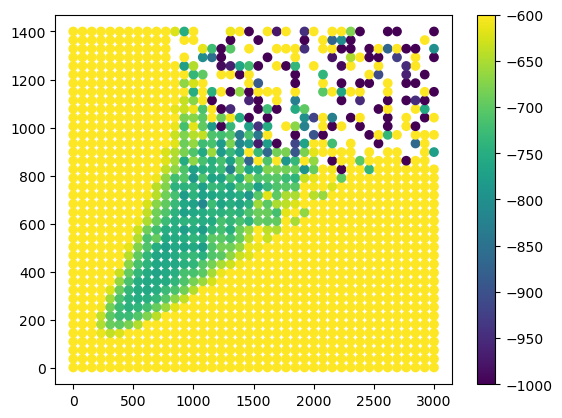

In [24]:
%matplotlib inline
plt.scatter(train_df['lambda0'], train_df['sigma0'], c=train_df['nll'], vmax=-600, vmin=-1000)
plt.colorbar()

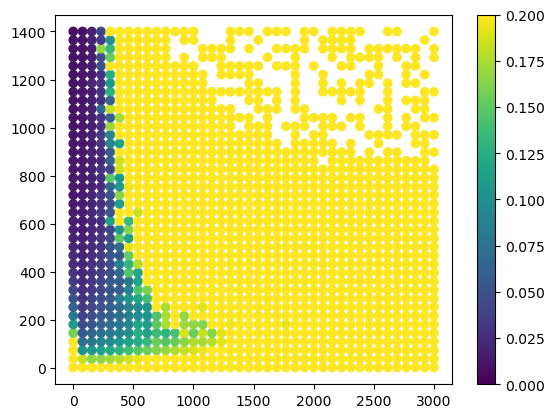

In [29]:
plt.scatter(train_df['lambda0'], train_df['sigma0'], c=train_df['train RMSE'], vmin=0, vmax=0.2)
plt.colorbar()

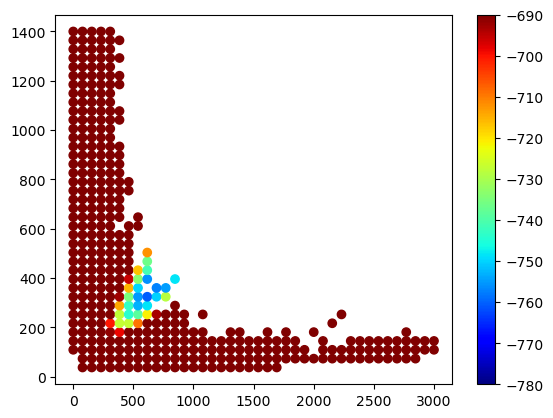

In [42]:
filtered_df = train_df[train_df['train RMSE'] <=0.3]
plt.scatter(filtered_df['lambda0'], filtered_df['sigma0'], c=filtered_df['nll'], vmax=-690, vmin=-780, cmap='jet')
plt.colorbar()

In [43]:
filtered_df[filtered_df['nll'] == filtered_df['nll'].min()]

,lambda0,sigma0,beta_hat,nll,train RMSE
329,616.179487,323.846154,"[[94.6918], [0.26234937]]",-760.521362,0.1602103


In [45]:
train_df[326:333]

,lambda0,sigma0,beta_hat,nll,train RMSE
326,616.179487,216.230769,"[[142.46613], [0.25048637]]",-678.067993,0.10440133
327,616.179487,252.102564,"[[122.24481], [0.2570374]]",-721.106567,0.1045366
328,616.179487,287.974359,"[[107.17139], [0.259997]]",-748.419434,0.13938849
329,616.179487,323.846154,"[[94.6918], [0.26234937]]",-760.521362,0.1602103
330,616.179487,359.717949,"[[69.25156], [0.27409136]]",-760.760376,0.4686037
331,616.179487,395.589744,"[[69.853516], [0.2681259]]",-755.899292,0.29830936
332,616.179487,431.461538,"[[63.229553], [0.2780465]]",-741.275513,0.26068476
